In [1]:
import pandas as pd
import datetime as dt
import regex as re

In [2]:
df_retail01 = pd.read_csv("C:/Users/ayan1/Downloads/Usecase_DemadForecasting1/Transactional_data_retail_01.csv")
df_retail02 = pd.read_csv("C:/Users/ayan1/Downloads/Usecase_DemadForecasting1/Transactional_data_retail_02.csv")
df_customer_demo = pd.read_csv("C:/Users/ayan1/Downloads/Usecase_DemadForecasting1/CustomerDemographics.csv")
df_product_info = pd.read_csv("C:/Users/ayan1/Downloads/Usecase_DemadForecasting1/ProductInfo.csv")
df_retail01.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,01 December 2021
1,489434,79323P,12,6.75,13085.0,01 December 2021
2,489434,79323W,12,6.75,13085.0,01 December 2021
3,489434,22041,48,2.10,13085.0,01 December 2021
4,489434,21232,24,1.25,13085.0,01 December 2021


In [3]:
# Combine datasets
df_transaction = pd.concat([df_retail01, df_retail02])

# Remove duplicates
df_transaction.drop_duplicates(inplace=True)

In [4]:
df_transaction.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate
0,489434,85048,12,6.95,13085.0,01 December 2021
1,489434,79323P,12,6.75,13085.0,01 December 2021
2,489434,79323W,12,6.75,13085.0,01 December 2021
3,489434,22041,48,2.10,13085.0,01 December 2021
4,489434,21232,24,1.25,13085.0,01 December 2021


In [5]:
df_transaction.shape

(1055234, 6)

In [6]:
# Check for missing values
df_transaction.isnull().sum()

# Option 1: Fill missing values (example: filling with mean)
# df_transaction['quantity'] = df_transaction['quantity'].fillna(df_transaction['quantity'].mean())

# Option 2: Drop rows with missing values
# df_transaction.dropna(inplace=True)


Invoice             0
StockCode           0
Quantity            0
Price               0
Customer ID    242870
InvoiceDate         0
dtype: int64

In [7]:
print("Transaction data columns:")
for i,j in enumerate(df_transaction.columns):
    print(f"{i} : {j}")

print("\nProduct info columns:")
for i,j in enumerate(df_product_info.columns):
    print(f"{i} : {j}")

print("\nCustomer demographic data columns:")
for i,j in enumerate(df_customer_demo.columns):
    print(f"{i} : {j}")


Transaction data columns:
0 : Invoice
1 : StockCode
2 : Quantity
3 : Price
4 : Customer ID
5 : InvoiceDate

Product info columns:
0 : StockCode
1 : Description

Customer demographic data columns:
0 : Customer ID
1 : Country


In [8]:
# Merge transaction with product info
df_transaction = pd.merge(df_transaction, df_product_info, on='StockCode', how='left')

# Merge transaction with customer demographics
df_transaction = pd.merge(df_transaction, df_customer_demo, on='Customer ID', how='left')


In [9]:
df_transaction.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Description,Country
0,489434,85048,12,6.95,13085.0,01 December 2021,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom
1,489434,79323P,12,6.75,13085.0,01 December 2021,PINK CHERRY LIGHTS,United Kingdom
2,489434,79323P,12,6.75,13085.0,01 December 2021,"Unsaleable, destroyed.",United Kingdom
3,489434,79323P,12,6.75,13085.0,01 December 2021,NaN,United Kingdom
4,489434,79323W,12,6.75,13085.0,01 December 2021,WHITE CHERRY LIGHTS,United Kingdom


In [10]:
# Deriving total revenue
df_transaction['Revenue'] = df_transaction['Quantity'] * df_transaction['Quantity']


In [11]:
len(df_transaction['InvoiceDate'].unique())

612

In [12]:
from dateutil import parser

# Create a new column with converted dates
df_transaction['InvoiceDate'] = df_transaction['InvoiceDate'].apply(
    lambda x: parser.parse(x, dayfirst=True) if isinstance(x, str) else pd.NaT
)

len(df_transaction['InvoiceDate'].unique())

604

In [13]:
# Extracting date-related features
df_transaction['Month'] = df_transaction['InvoiceDate'].dt.month
df_transaction['Day_Of_Week'] = df_transaction['InvoiceDate'].dt.weekday
df_transaction['Day_Of_Year'] = df_transaction['InvoiceDate'].dt.year

In [14]:
df_transaction.head(5)

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Description,Country,Revenue,Month,Day_Of_Week,Day_Of_Year
0,489434,85048,12,6.95,13085.0,2021-12-01,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom,144,12,2,2021
1,489434,79323P,12,6.75,13085.0,2021-12-01,PINK CHERRY LIGHTS,United Kingdom,144,12,2,2021
2,489434,79323P,12,6.75,13085.0,2021-12-01,"Unsaleable, destroyed.",United Kingdom,144,12,2,2021
3,489434,79323P,12,6.75,13085.0,2021-12-01,NaN,United Kingdom,144,12,2,2021
4,489434,79323W,12,6.75,13085.0,2021-12-01,WHITE CHERRY LIGHTS,United Kingdom,144,12,2,2021


In [16]:
from scipy import stats

# Detect outliers using z-score
df_transaction['z_score_quantity'] = stats.zscore(df_transaction['Quantity'])

# Removing extreme outliers
df_transaction = df_transaction[df_transaction['z_score_quantity'].abs() < 3]


In [17]:
from sklearn.preprocessing import StandardScaler

# Standardize quantity
scaler = StandardScaler()
df_transaction['quantity_scaled'] = scaler.fit_transform(df_transaction[['Quantity']])


C:\Users\ayan1\AppData\Local\Temp\ipykernel_20348\666371830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction['quantity_scaled'] = scaler.fit_transform(df_transaction[['Quantity']])


In [18]:
df_transaction.head()

,Invoice,StockCode,Quantity,Price,Customer ID,InvoiceDate,Description,Country,Revenue,Month,Day_Of_Week,Day_Of_Year,z_score_quantity,quantity_scaled
0,489434,85048,12,6.95,13085.0,2021-12-01,15CM CHRISTMAS GLASS BALL 20 LIGHTS,United Kingdom,144,12,2,2021,0.013674,0.118326
1,489434,79323P,12,6.75,13085.0,2021-12-01,PINK CHERRY LIGHTS,United Kingdom,144,12,2,2021,0.013674,0.118326
2,489434,79323P,12,6.75,13085.0,2021-12-01,"Unsaleable, destroyed.",United Kingdom,144,12,2,2021,0.013674,0.118326
3,489434,79323P,12,6.75,13085.0,2021-12-01,NaN,United Kingdom,144,12,2,2021,0.013674,0.118326
4,489434,79323W,12,6.75,13085.0,2021-12-01,WHITE CHERRY LIGHTS,United Kingdom,144,12,2,2021,0.013674,0.118326


In [20]:
for i,j in enumerate(df_transaction.columns):
    print(f"{i} : {j}")

0 : Invoice
1 : StockCode
2 : Quantity
3 : Price
4 : Customer ID
5 : InvoiceDate
6 : Description
7 : Country
8 : Revenue
9 : Month
10 : Day_Of_Week
11 : Day_Of_Year
12 : z_score_quantity
13 : quantity_scaled


In [19]:
df_transaction.to_csv('processed_transaction_data.csv', index=False)

In [21]:
# Summary stats
df_transaction[['Quantity', 'Revenue', 'quantity_scaled']].describe()

,Quantity,Revenue,quantity_scaled
count,2.088469e+06,2.088469e+06,2.088469e+06
mean,9.173688e+00,6.546895e+02,-1.600403e-17
std,2.388584e+01,5.533588e+03,1.000000e+00
min,-4.100000e+02,1.000000e+00,-1.754905e+01
25%,1.000000e+00,1.000000e+00,-3.421981e-01
50%,3.000000e+00,1.600000e+01,-2.584665e-01
75%,1.000000e+01,1.000000e+02,3.459425e-02
max,4.300000e+02,1.849000e+05,1.761824e+01


In [22]:
# Top 10 best-selling products by quantity
top_10_quantity = df_transaction.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top 10 revenue-generating products
top_10_revenue = df_transaction.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False).head(10)

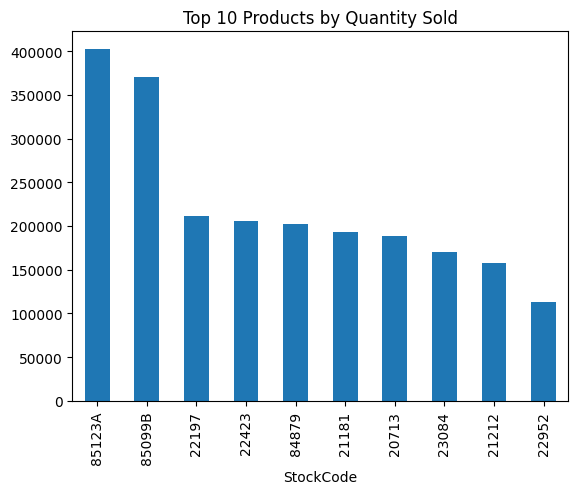

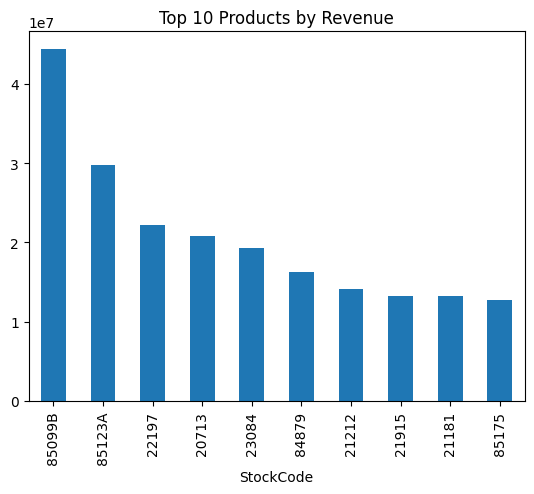

In [23]:
import matplotlib.pyplot as plt

# Bar plot for top 10 products by quantity
top_10_quantity.plot(kind='bar', title='Top 10 Products by Quantity Sold')
plt.show()

# Bar plot for top 10 products by revenue
top_10_revenue.plot(kind='bar', title='Top 10 Products by Revenue')
plt.show()


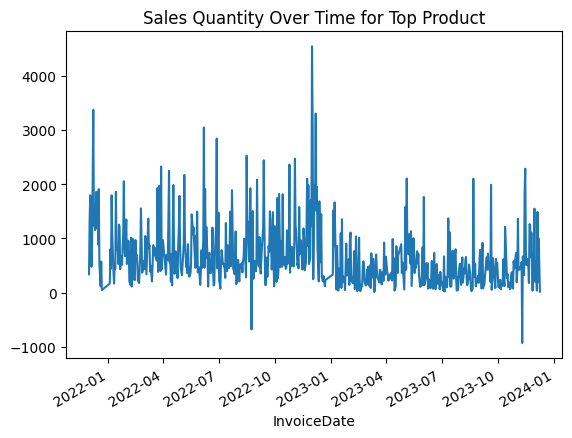

In [24]:
# Example time series plot for a top product
df_top_product = df_transaction[df_transaction['StockCode'] == top_10_quantity.index[0]]
df_top_product.groupby('InvoiceDate')['Quantity'].sum().plot(title='Sales Quantity Over Time for Top Product')
plt.show()

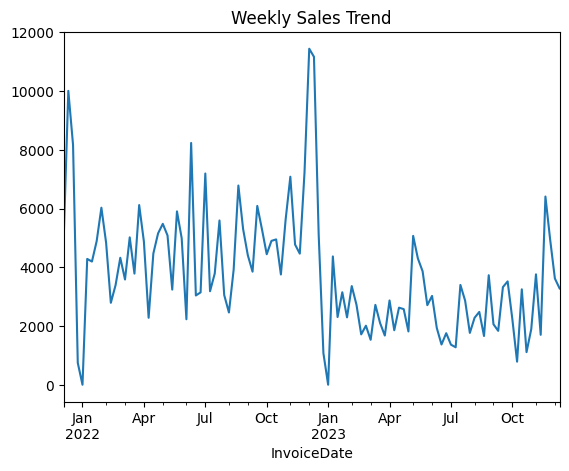

In [25]:
# Resample data to weekly frequency for one of the top products
df_top_product = df_transaction[df_transaction['StockCode'] == top_10_quantity.index[0]]
df_top_product_weekly = df_top_product.resample('W', on='InvoiceDate')['Quantity'].sum()

# Plot the weekly sales trend
df_top_product_weekly.plot(title='Weekly Sales Trend')
plt.show()


In [26]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(df_top_product_weekly)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -2.566020022328691
p-value: 0.10022555368016278


In [27]:
# Apply first-order differencing
df_top_product_weekly_diff = df_top_product_weekly.diff().dropna()

# Re-run the ADF test on the differenced data
adf_result_diff = adfuller(df_top_product_weekly_diff)
print(f'ADF Statistic (after differencing): {adf_result_diff[0]}')
print(f'p-value (after differencing): {adf_result_diff[1]}')


ADF Statistic (after differencing): -9.422654472594854
p-value (after differencing): 5.45058258747966e-16


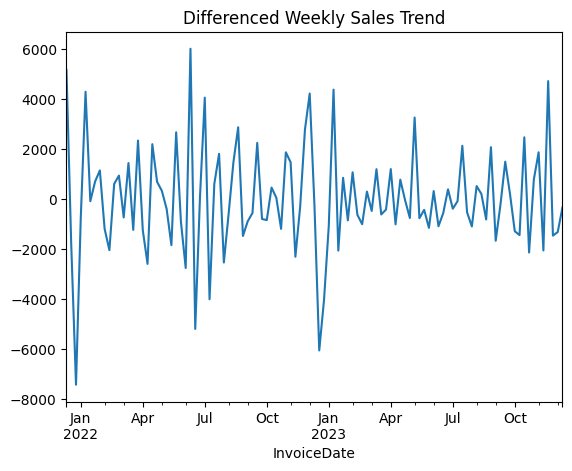

In [28]:
df_top_product_weekly_diff.plot(title='Differenced Weekly Sales Trend')
plt.show()


In [31]:
pip install pmdarima


  Using cached Cython-3.0.11-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 3.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.8 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
from pmdarima import auto_arima

# Fit auto-ARIMA on the differenced data
model = auto_arima(df_top_product_weekly, seasonal=False, d=1, trace=True)
model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1913.605, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1913.066, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1896.369, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1911.615, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1878.452, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1878.644, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1881.658, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1877.345, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1876.476, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1894.458, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  106
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -935.238
Date:                Sun, 06 Oct 2024   AIC                           1876.476
Time:                        09:58:01   BIC                           1884.438
Sample:                    12-05-2021   HQIC                          1879.702
                         - 12-10-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3767      0.079     -4.763      0.000      -0.532      -0.222
ma.L2         -0.5084      0.080     -6.317      0.000      -0.666      -0.351
sigma2      3.156e+06   3.67e+05      8.591      0.000    2.44e+06    3.88e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                 9.46
Prob(Q):                              0.33   Prob(JB):                         0.01
Heteroskedasticity (H):               0.42   Skew:                             0.44
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

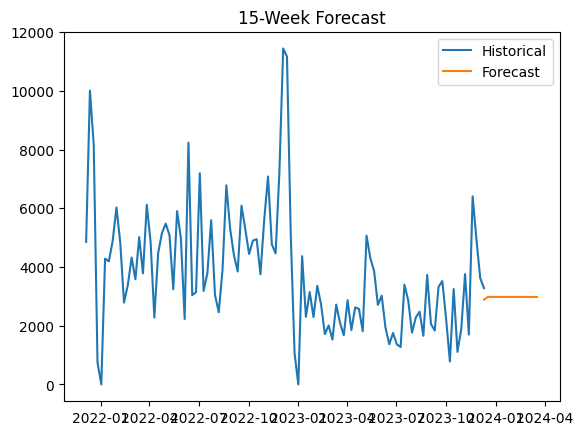

In [33]:
# Forecast for the next 15 weeks
forecast = model.predict(n_periods=15)

# Plot the forecast along with historical data
plt.plot(df_top_product_weekly.index, df_top_product_weekly, label='Historical')
plt.plot(pd.date_range(df_top_product_weekly.index[-1], periods=15, freq='W'), forecast, label='Forecast')
plt.legend()
plt.title('15-Week Forecast')
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example of a split (train-test)
train = df_top_product_weekly[:-15]
test = df_top_product_weekly[-15:]

# Fit ARIMA model on train set
model_train = auto_arima(train, seasonal=False, trace=True)

# Predict on the test set
forecast_test = model_train.predict(n_periods=15)

# Calculate RMSE and MAE
rmse = mean_squared_error(test, forecast_test, squared=False)
mae = mean_absolute_error(test, forecast_test)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1616.002, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1644.082, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1645.025, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1632.429, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1642.090, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1614.283, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1614.005, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1615.985, Time=0.12 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1617.761, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1612.863, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1611.548, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1630.8

C:\Users\ayan1\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


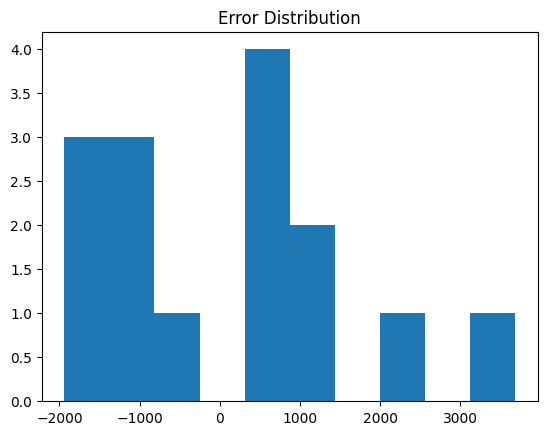

In [35]:
# Calculate the errors for the test set
errors = test - forecast_test

# Plot histogram of errors
plt.hist(errors, bins=10)
plt.title('Error Distribution')
plt.show()


In [36]:
pip install streamlit



  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
